In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import shap

: 

In [ ]:
co_variance = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_cv_genes.tsv', sep='\t', index_col=0)

X = co_variance.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = co_variance['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
svm_model = SVC(kernel='linear', probability=True)

In [ ]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9853671282989287
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1921
           1       0.98      0.99      0.99      1906

    accuracy                           0.99      3827
   macro avg       0.99      0.99      0.99      3827
weighted avg       0.99      0.99      0.99      3827

Confusion Matrix:
 [[1892   29]
 [  27 1879]]


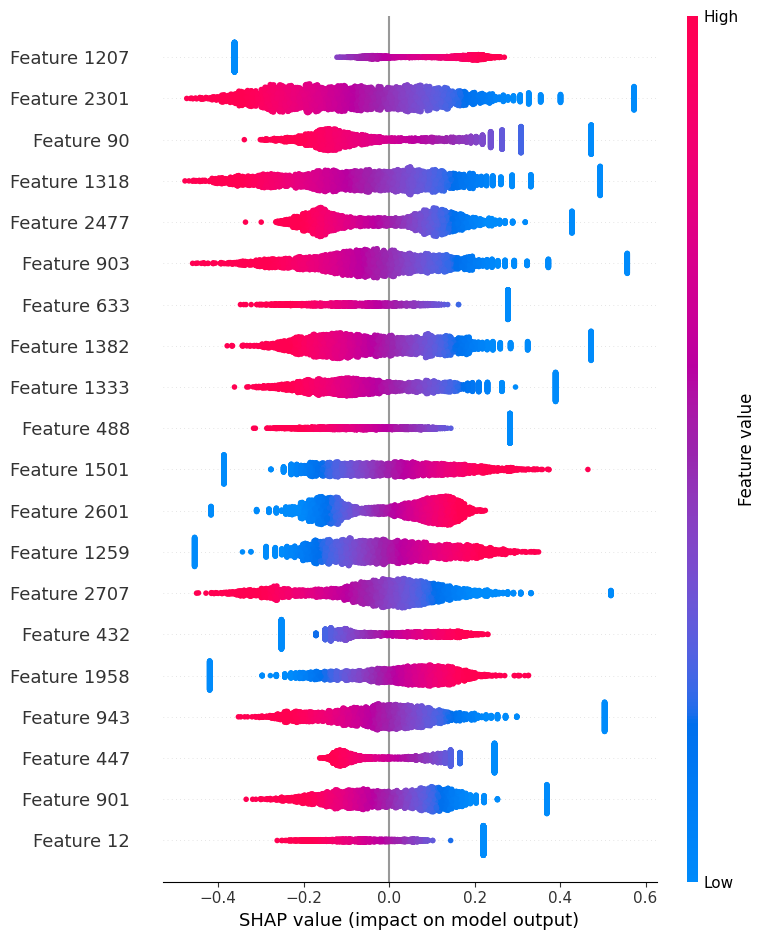

In [ ]:
explainer = shap.LinearExplainer(svm_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Top 10 most important genes based on SHAP values:
1: ENSG00000219928.2 (Mean Absolute SHAP: 0.1890)
2: ENSG00000112936.18 (Mean Absolute SHAP: 0.1694)
3: ENSG00000183421.11 (Mean Absolute SHAP: 0.1671)
4: ENSG00000064205.10 (Mean Absolute SHAP: 0.1574)
5: ENSG00000089356.16 (Mean Absolute SHAP: 0.1357)
6: ENSG00000102802.9 (Mean Absolute SHAP: 0.1349)
7: ENSG00000244116.3 (Mean Absolute SHAP: 0.1342)
8: ENSG00000197614.10 (Mean Absolute SHAP: 0.1326)
9: ENSG00000143196.4 (Mean Absolute SHAP: 0.1299)
10: ENSG00000244437.1 (Mean Absolute SHAP: 0.1295)


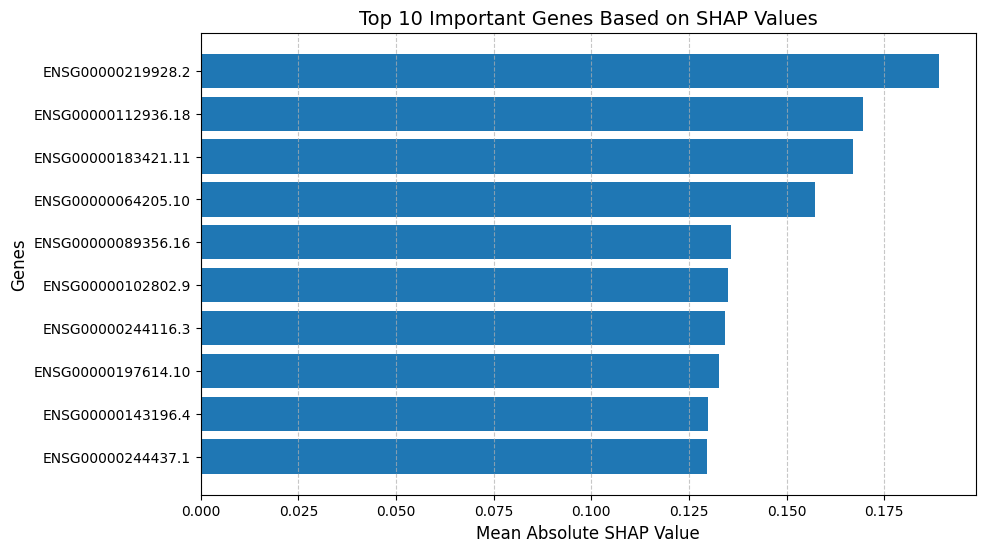

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Assuming X_test is your input data and variance_data contains the gene names
feature_names = co_variance.drop(columns=['cancer_status']).columns  # Extract gene names

# Create a dictionary to map gene names to their corresponding SHAP values
shap_gene_mapping = {}

# Loop through SHAP values and assign them to gene names
for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]


# Compute the mean absolute SHAP value for each gene
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Sort genes by importance (mean absolute SHAP value)
sorted_genes = np.argsort(mean_abs_shap)[::-1]  # Descending order

# Extract the top 10 most important genes
top_10_genes = [feature_names[i] for i in sorted_genes[:10]]

# Print the results
print("Top 10 most important genes based on SHAP values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

# Plot the top 10 genes by their mean absolute SHAP value
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_shap[sorted_genes[:10]][::-1])  # Reverse for horizontal bar chart
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on SHAP Values', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# X_test
feature_names = co_variance.drop(columns=['cancer_status']).columns  

# dict to store shap values and genes
shap_gene_mapping = {}

for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]

# Compute the mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)

#sort
sorted_genes = np.argsort(mean_abs_shap)[::-1]
top_100_genes = [feature_names[i] for i in sorted_genes[:100]]
print("Top 100 most important genes based on SHAP values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

Top 100 most important genes based on SHAP values:
1: ENSG00000219928.2 (Mean Absolute SHAP: 0.1890)
2: ENSG00000112936.18 (Mean Absolute SHAP: 0.1694)
3: ENSG00000183421.11 (Mean Absolute SHAP: 0.1671)
4: ENSG00000064205.10 (Mean Absolute SHAP: 0.1574)
5: ENSG00000089356.16 (Mean Absolute SHAP: 0.1357)
6: ENSG00000102802.9 (Mean Absolute SHAP: 0.1349)
7: ENSG00000244116.3 (Mean Absolute SHAP: 0.1342)
8: ENSG00000197614.10 (Mean Absolute SHAP: 0.1326)
9: ENSG00000143196.4 (Mean Absolute SHAP: 0.1299)
10: ENSG00000244437.1 (Mean Absolute SHAP: 0.1295)
11: ENSG00000211892.3 (Mean Absolute SHAP: 0.1266)
12: ENSG00000163435.15 (Mean Absolute SHAP: 0.1233)
13: ENSG00000102109.8 (Mean Absolute SHAP: 0.1230)
14: ENSG00000160307.9 (Mean Absolute SHAP: 0.1158)
15: ENSG00000165215.6 (Mean Absolute SHAP: 0.1118)
16: ENSG00000172236.16 (Mean Absolute SHAP: 0.1114)
17: ENSG00000182916.7 (Mean Absolute SHAP: 0.1098)
18: ENSG00000104413.15 (Mean Absolute SHAP: 0.1095)
19: ENSG00000170476.15 (Mean Abs

In [ ]:
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute SHAP": mean_abs_shap[sorted_genes[:100]]
})

top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//SVM//top_100_genes_SHAP_cv.csv", index=False)

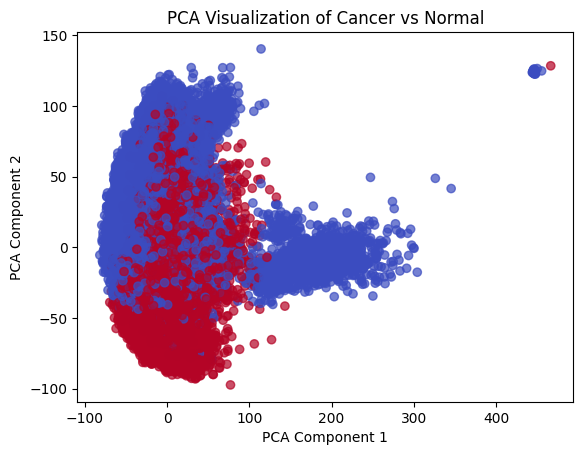

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Cancer vs Normal')
plt.show()


Processing sample 0/3827...
Processing sample 10/3827...
Processing sample 20/3827...
Processing sample 30/3827...
Processing sample 40/3827...
Processing sample 50/3827...
Processing sample 60/3827...
Processing sample 70/3827...
Processing sample 80/3827...
Processing sample 90/3827...
Processing sample 100/3827...
Processing sample 110/3827...
Processing sample 120/3827...
Processing sample 130/3827...
Processing sample 140/3827...
Processing sample 150/3827...
Processing sample 160/3827...
Processing sample 170/3827...
Processing sample 180/3827...
Processing sample 190/3827...
Processing sample 200/3827...
Processing sample 210/3827...
Processing sample 220/3827...
Processing sample 230/3827...
Processing sample 240/3827...
Processing sample 250/3827...
Processing sample 260/3827...
Processing sample 270/3827...
Processing sample 280/3827...
Processing sample 290/3827...
Processing sample 300/3827...
Processing sample 310/3827...
Processing sample 320/3827...
Processing sample 330

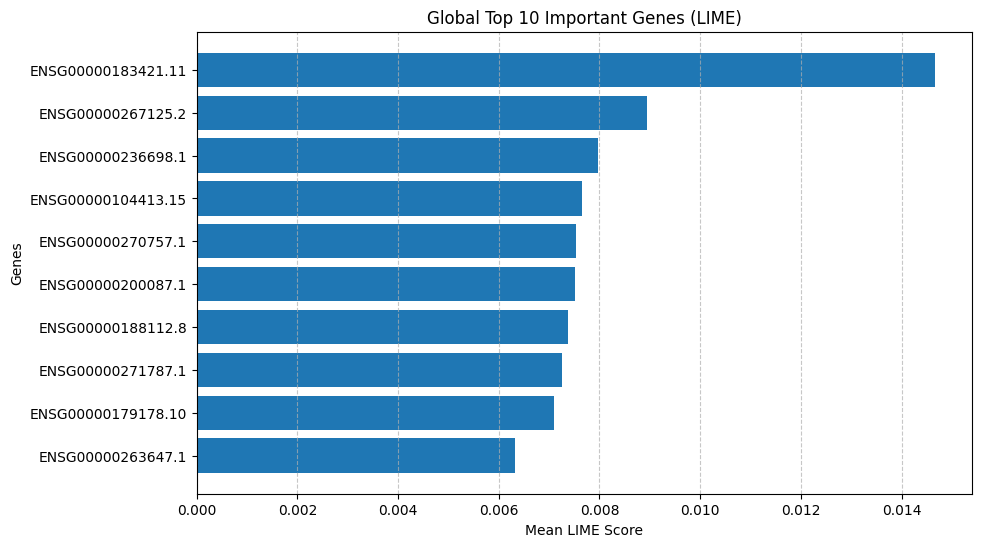

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature names
feature_names = co_variance.drop(columns=['cancer_status']).columns.tolist()

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=feature_names, 
    class_names=['Normal', 'Cancer'], 
    mode='classification'
)

# Dict to store gene names
lime_scores = {gene: [] for gene in feature_names}

num_samples = len(X_test)  

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  
    
    # Print progress update
    if idx % 10 == 0:  # Update every 10 samples
        print(f"Processing sample {idx}/{num_samples}...")

    explanation = explainer.explain_instance(sample.flatten(), svm_model.predict_proba, num_features=len(feature_names))  
    
    # Store feature importance values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene name 
        if gene in lime_scores:  
            lime_scores[gene].append(score)

# Compute mean importance scores 
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores}  

lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

# Print top 10 most important genes
top_10_genes = lime_df.head(10)
print("\nTop 10 Most Important Genes Based on LIME:")
print(top_10_genes)

# Plot the top 10 global important genes
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes["Gene"][::-1], top_10_genes["Mean LIME Score"][::-1])  
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
top_100_genes = lime_df.head(100)
print("\nTop 100 Most Important Genes Based on LIME:")
print(top_100_genes)


Top 100 Most Important Genes Based on LIME:
                    Gene  Mean LIME Score
90    ENSG00000183421.11         0.014659
1088   ENSG00000267125.2         0.008934
1580   ENSG00000236698.1         0.007973
447   ENSG00000104413.15         0.007645
242    ENSG00000270757.1         0.007540
...                  ...              ...
1269  ENSG00000172058.15         0.002381
1617  ENSG00000221955.10         0.002377
429    ENSG00000269145.2         0.002377
2873  ENSG00000070778.12         0.002375
2032  ENSG00000144366.15         0.002371

[100 rows x 2 columns]


In [ ]:
top_100_genes.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//SVM//top_100_lime_genes_cv.csv", index=False)